In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from functools import partial

# Plot training and validation metrics
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

Found 28709 images belonging to 7 classes.


2023-10-17 06:06:57.605192: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-17 06:06:57.605218: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-17 06:06:57.605224: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-17 06:06:57.605278: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-17 06:06:57.605413: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


94765736/94765736 [==============================] - 8s 0us/step
Epoch 1/50


2023-10-17 06:07:09.223294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


256/256 [==============================] - 35s 110ms/step - loss: 3.8089 - categorical_accuracy: 0.2621 - val_loss: 852.8337 - val_categorical_accuracy: 0.1085
Epoch 2/50
256/256 [==============================] - 27s 105ms/step - loss: 2.0939 - categorical_accuracy: 0.3704 - val_loss: 349.1257 - val_categorical_accuracy: 0.1095
Epoch 3/50
256/256 [==============================] - 27s 105ms/step - loss: 1.9255 - categorical_accuracy: 0.3917 - val_loss: 5.5970 - val_categorical_accuracy: 0.1750
Epoch 4/50
256/256 [==============================] - 27s 105ms/step - loss: 1.7612 - categorical_accuracy: 0.4465 - val_loss: 2.8218 - val_categorical_accuracy: 0.2826
Epoch 5/50
256/256 [==============================] - 27s 106ms/step - loss: 1.4030 - categorical_accuracy: 0.5620 - val_loss: 2.9795 - val_categorical_accuracy: 0.3369
Epoch 6/50
256/256 [==============================] - 27s 106ms/step - loss: 1.0433 - categorical_accuracy: 0.6718 - val_loss: 3.4033 - val_categorical_accuracy: 

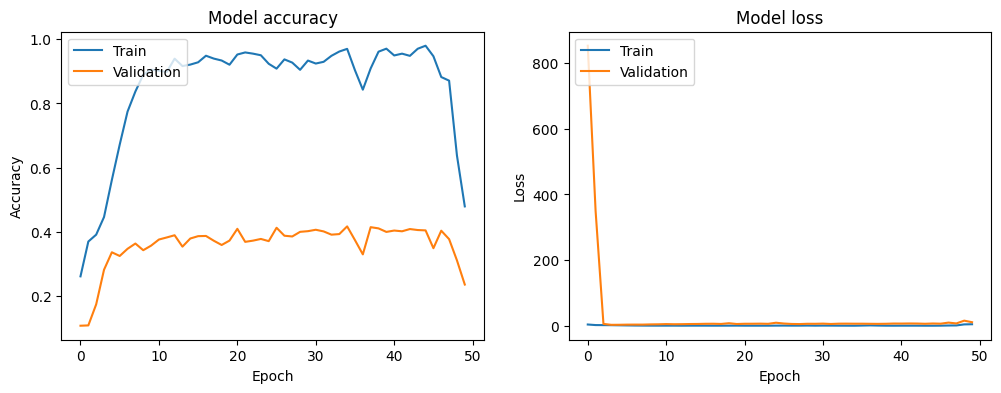

256/256 [==============================] - 6s 22ms/step - loss: 10.7764 - categorical_accuracy: 0.2366
Test accuracy: 23.66%
Time Taken for Execution:  1898.2855989933014


In [2]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

vgg16_base = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the VGG16 base model to your Sequential model
model.add(vgg16_base)

# Add your custom layers on top of VGG16
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('fer_resnet_pretrained.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

Found 28709 images belonging to 7 classes.
Epoch 1/30
4/4 [==============================] - 7s 622ms/step - loss: 4.2002 - categorical_accuracy: 0.1875 - val_loss: 2.8088 - val_categorical_accuracy: 0.2266
Epoch 2/30
4/4 [==============================] - 1s 186ms/step - loss: 1.0484 - categorical_accuracy: 0.6953 - val_loss: 2.5069 - val_categorical_accuracy: 0.1953
Epoch 3/30
4/4 [==============================] - 1s 203ms/step - loss: 0.4312 - categorical_accuracy: 0.8594 - val_loss: 3.1806 - val_categorical_accuracy: 0.2266
Epoch 4/30
4/4 [==============================] - 1s 142ms/step - loss: 0.2380 - categorical_accuracy: 0.9453 - val_loss: 4.0924 - val_categorical_accuracy: 0.2266
Epoch 5/30
4/4 [==============================] - 0s 120ms/step - loss: 0.1808 - categorical_accuracy: 0.9453 - val_loss: 4.3155 - val_categorical_accuracy: 0.2031
Epoch 6/30
4/4 [==============================] - 0s 121ms/step - loss: 0.1171 - categorical_accuracy: 0.9609 - val_loss: 4.5883 - val_ca

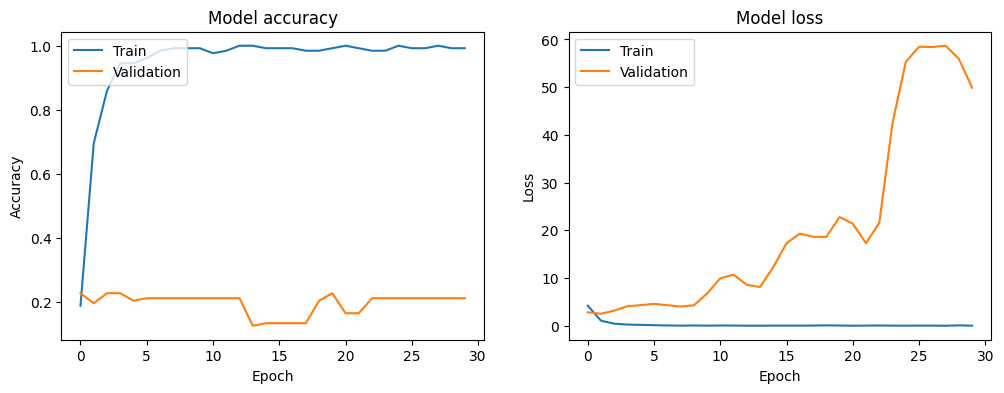

4/4 [==============================] - 0s 24ms/step - loss: 49.9047 - categorical_accuracy: 0.2109
Test accuracy: 21.09%
Time Taken for Execution:  23.620279788970947


In [6]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 128
epochs = 30

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the Resnet base model to your Sequential model
model.add(resnet50_base)

# Add your custom layers on top of Resnet50
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
#model.save('fer_resnet_pretrained.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

Found 28709 images belonging to 7 classes.
Epoch 1/30
8/8 [==============================] - 9s 493ms/step - loss: 5.0601 - categorical_accuracy: 0.1602 - val_loss: 2.8714 - val_categorical_accuracy: 0.1953
Epoch 2/30
8/8 [==============================] - 2s 232ms/step - loss: 2.6638 - categorical_accuracy: 0.4688 - val_loss: 5.5382 - val_categorical_accuracy: 0.1953
Epoch 3/30
8/8 [==============================] - 1s 121ms/step - loss: 1.3577 - categorical_accuracy: 0.6953 - val_loss: 11.4577 - val_categorical_accuracy: 0.1953
Epoch 4/30
8/8 [==============================] - 1s 121ms/step - loss: 0.9123 - categorical_accuracy: 0.7773 - val_loss: 6.0195 - val_categorical_accuracy: 0.2031
Epoch 5/30
8/8 [==============================] - 1s 128ms/step - loss: 0.5712 - categorical_accuracy: 0.8789 - val_loss: 8.6953 - val_categorical_accuracy: 0.1953
Epoch 6/30
8/8 [==============================] - 1s 120ms/step - loss: 0.5437 - categorical_accuracy: 0.8828 - val_loss: 20.1532 - val_

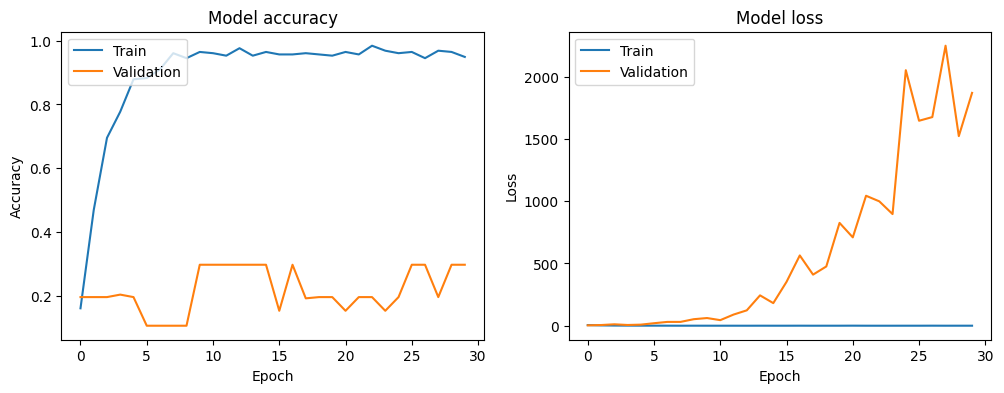

8/8 [==============================] - 0s 33ms/step - loss: 1868.8131 - categorical_accuracy: 0.2969
Test accuracy: 29.69%
Time Taken for Execution:  39.35890197753906


In [7]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 256
epochs = 30

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the Resnet base model to your Sequential model
model.add(resnet50_base)

# Add your custom layers on top of Resnet50
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
#model.save('fer_resnet_pretrained.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

Found 28709 images belonging to 7 classes.
Epoch 1/30
8/8 [==============================] - 11s 906ms/step - loss: 14.4245 - categorical_accuracy: 0.2109 - val_loss: 9.2346 - val_categorical_accuracy: 0.1641
Epoch 2/30
8/8 [==============================] - 6s 758ms/step - loss: 7.1259 - categorical_accuracy: 0.2266 - val_loss: 5.8699 - val_categorical_accuracy: 0.1250
Epoch 3/30
8/8 [==============================] - 6s 746ms/step - loss: 5.6065 - categorical_accuracy: 0.2070 - val_loss: 6.4004 - val_categorical_accuracy: 0.1641
Epoch 4/30
8/8 [==============================] - 5s 724ms/step - loss: 4.6975 - categorical_accuracy: 0.1914 - val_loss: 4.8366 - val_categorical_accuracy: 0.1406
Epoch 5/30
8/8 [==============================] - 6s 749ms/step - loss: 3.0372 - categorical_accuracy: 0.2148 - val_loss: 3.4128 - val_categorical_accuracy: 0.1836
Epoch 6/30
8/8 [==============================] - 6s 739ms/step - loss: 2.7149 - categorical_accuracy: 0.2109 - val_loss: 2.6589 - val_

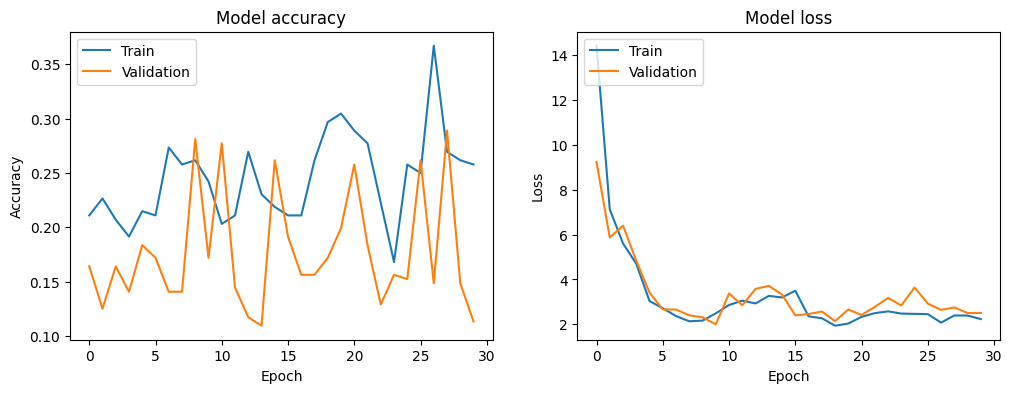

8/8 [==============================] - 2s 272ms/step - loss: 2.5057 - categorical_accuracy: 0.1133
Test accuracy: 11.33%
Time Taken for Execution:  183.6606900691986


In [11]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (224, 224, 3)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 256
epochs = 30

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in resnet50_base.layers:
    layer.trainable = False

model = Sequential()

# Add the Resnet base model to your Sequential model
model.add(resnet50_base)

# Add your custom layers on top of Resnet50
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
#model.save('fer_resnet_pretrained.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Expand dimensions to add a channel (1 for grayscale)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create a Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add fully connected layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 0.6506 - accuracy: 0.7590 - val_loss: 0.4441 - val_accuracy: 0.8347
Epoch 2/5
938/938 [==============================] - 15s 16ms/step - loss: 0.4365 - accuracy: 0.8454 - val_loss: 0.3699 - val_accuracy: 0.8677
Epoch 3/5
938/938 [==============================] - 15s 16ms/step - loss: 0.3865 - accuracy: 0.8654 - val_loss: 0.3787 - val_accuracy: 0.8674
Epoch 4/5
938/938 [==============================] - 15s 16ms/step - loss: 0.3676 - accuracy: 0.8716 - val_loss: 0.3793 - val_accuracy: 0.8658
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.3473 - accuracy: 0.8785
Test Accuracy: 87.85%


Found 28709 images belonging to 7 classes.
Epoch 1/50
51/51 [==============================] - 1s 15ms/step - loss: 1.9506 - categorical_accuracy: 0.2353 - val_loss: 1.9281 - val_categorical_accuracy: 0.0769
Epoch 2/50
51/51 [==============================] - 1s 12ms/step - loss: 1.8884 - categorical_accuracy: 0.2745 - val_loss: 1.9294 - val_categorical_accuracy: 0.0769
Epoch 3/50
51/51 [==============================] - 1s 12ms/step - loss: 1.8649 - categorical_accuracy: 0.2745 - val_loss: 1.8926 - val_categorical_accuracy: 0.0769
Epoch 4/50
51/51 [==============================] - 1s 12ms/step - loss: 1.8994 - categorical_accuracy: 0.3137 - val_loss: 1.8911 - val_categorical_accuracy: 0.0769
Epoch 5/50
51/51 [==============================] - 1s 12ms/step - loss: 1.8227 - categorical_accuracy: 0.2745 - val_loss: 1.8950 - val_categorical_accuracy: 0.0769
Epoch 6/50
51/51 [==============================] - 1s 12ms/step - loss: 1.8038 - categorical_accuracy: 0.2941 - val_loss: 1.8986 - 

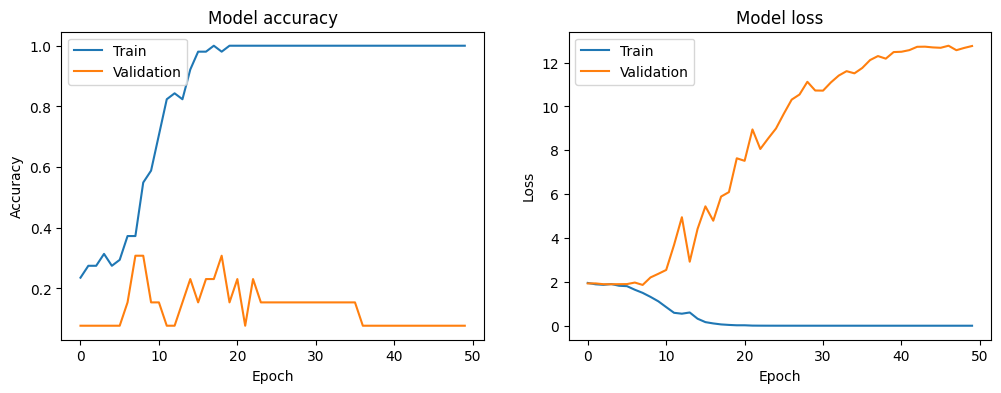

Total training time: 31.35699200630188 seconds


In [18]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context
start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 64
epochs = 5

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Define a custom CNN model
model = Sequential()
# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add fully connected layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the generator
model.fit(datagen_with_preprocessing, epochs=epochs, steps_per_epoch=len(datagen_with_preprocessing), validation_data=(X_val, y_val))

# Calculate and print the total time taken for training
end_time = time.time()
training_time = end_time - start_time
print(f"Total training time: {training_time} seconds")

Found 28709 images belonging to 7 classes.
Epoch 1/50
51/51 [==============================] - 1s 15ms/step - loss: 1.9837 - categorical_accuracy: 0.1961 - val_loss: 2.0947 - val_categorical_accuracy: 0.2308
Epoch 2/50
51/51 [==============================] - 1s 12ms/step - loss: 1.7939 - categorical_accuracy: 0.2941 - val_loss: 2.1005 - val_categorical_accuracy: 0.2308
Epoch 3/50
51/51 [==============================] - 1s 12ms/step - loss: 1.7675 - categorical_accuracy: 0.2941 - val_loss: 2.2563 - val_categorical_accuracy: 0.2308
Epoch 4/50
51/51 [==============================] - 1s 12ms/step - loss: 1.7415 - categorical_accuracy: 0.2941 - val_loss: 2.0568 - val_categorical_accuracy: 0.2308
Epoch 5/50
51/51 [==============================] - 1s 12ms/step - loss: 1.7651 - categorical_accuracy: 0.2941 - val_loss: 2.1625 - val_categorical_accuracy: 0.2308
Epoch 6/50
51/51 [==============================] - 1s 12ms/step - loss: 1.7849 - categorical_accuracy: 0.1765 - val_loss: 3.0231 - 

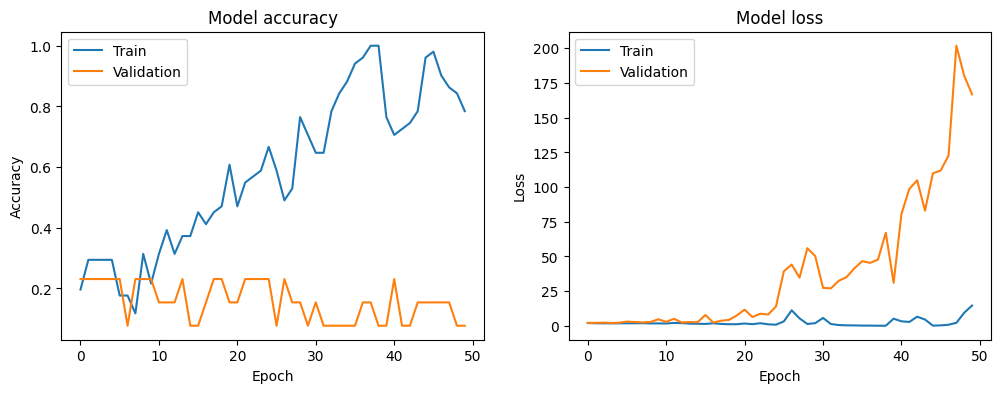

Total training time: 31.456228256225586 seconds


2023-10-18 16:01:03.665645: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-18 16:01:03.665674: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-18 16:01:03.665681: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-18 16:01:03.665720: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-18 16:01:03.665738: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        3200      
                                                                 
 batch_normalization (Batch  (None, 24, 24, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 12, 12, 64)        2

2023-10-18 16:01:06.029127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - 21s 74ms/step - loss: 1.7820 - accuracy: 0.2791 - val_loss: 1.8355 - val_accuracy: 0.2471 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 14s 60ms/step - loss: 1.6610 - accuracy: 0.3420 - val_loss: 2.0130 - val_accuracy: 0.2067 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 13s 60ms/step - loss: 1.5804 - accuracy: 0.3811 - val_loss: 2.6647 - val_accuracy: 0.2984 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 14s 60ms/step - loss: 1.5052 - accuracy: 0.4146 - val_loss: 1.7324 - val_accuracy: 0.3771 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 14s 60ms/step - loss: 1.4492 - accuracy: 0.4386 - val_loss: 1.4303 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 14s 60ms/step - loss: 1.4078 - accuracy: 0.4544 - val_loss: 1.8922 - val_accuracy: 0.2823 - lr: 0.0010
Epoch 7/50
225/225 [==============================] - 14s 60ms/step -

/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/57 [==============================] - 1s 15ms/step - loss: 0.9897 - accuracy: 0.6379
Test Accuracy: 63.79%
57/57 [==============================] - 1s 14ms/step


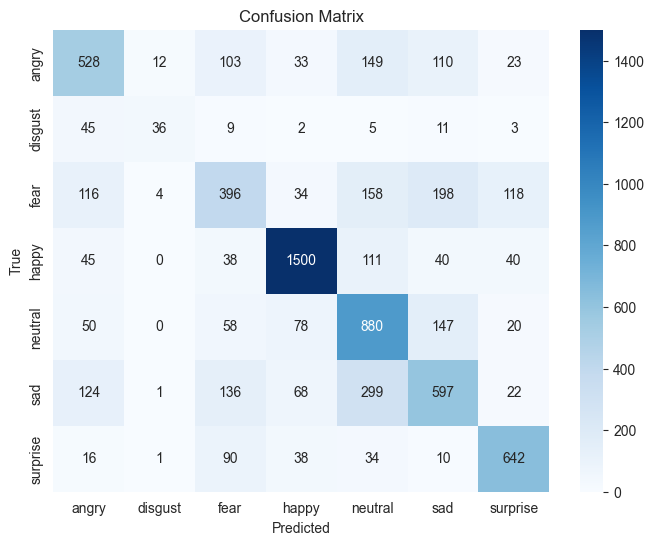

              precision    recall  f1-score   support

       angry       0.57      0.55      0.56       958
     disgust       0.67      0.32      0.44       111
        fear       0.48      0.39      0.43      1024
       happy       0.86      0.85      0.85      1774
     neutral       0.54      0.71      0.61      1233
         sad       0.54      0.48      0.51      1247
    surprise       0.74      0.77      0.76       831

    accuracy                           0.64      7178
   macro avg       0.63      0.58      0.59      7178
weighted avg       0.64      0.64      0.63      7178


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths to the training and testing directories
train_dir = 'data/train'
test_dir = 'data/test'

# Define constants
input_shape = (48, 48, 1)  # FER2013 image size is 48x48 with 1 channel (grayscale)
num_classes = 7  # 7 emotional categories in FER2013

# Create a data generator for data augmentation (optional)
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


def resnet_block(model, filters, kernel_size=3, stride=1):
    model.add(Conv2D(filters=filters, kernel_size=kernel_size, strides=stride, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters=filters, kernel_size=kernel_size, padding='same'))
    model.add(BatchNormalization())

    if stride > 1:
        model.add(Conv2D(filters=filters, kernel_size=1, strides=stride, padding='same'))

    model.add(Activation('relu'))

input_shape = (48, 48, 1)
num_classes = 7  # Assuming 7 classes for the FER2013 dataset

model = Sequential()

# Initial Convolution and Pooling
model.add(Conv2D(64, (7, 7), strides=2, padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((3, 3), strides=2, padding='same'))

# ResNet Blocks
resnet_block(model, 64)
resnet_block(model, 64)
resnet_block(model, 128, stride=2)
resnet_block(model, 128)
resnet_block(model, 256, stride=2)
resnet_block(model, 256)
resnet_block(model, 512, stride=2)
resnet_block(model, 512)

# Global Average Pooling and Output Layer
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

# Print a summary of the model architecture
model.summary()

# Compile the model with an appropriate optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
batch_size = 128
epochs = 50

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[early_stopping, lr_scheduler]
)

# Save the model
model.save("fer2013_resnet50_model.h5")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get true labels and predictions
true_labels = test_generator.classes
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="Blues", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)